# Format user uploaded digital ink 


In [72]:
import numpy as np
import json 
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import DBSCAN

In [73]:
with open("../data/uploaded_ink/ink.json") as f:
    ink = json.load(f)

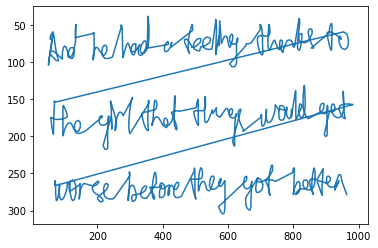

In [74]:
plt.plot(ink["x"], ink["y"])
plt.gca().invert_yaxis()
plt.show()

## Segment ink into individual lines

In [75]:
X = np.swapaxes(np.array([ink["x"], ink["y"], ink["t"]]), 0 , 1)

scaler = StandardScaler().fit(X)

X_norm = normalize(X, axis=0)
X_scaled = scaler.transform(X)

In [40]:
clustering = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)
labels = clustering.labels_

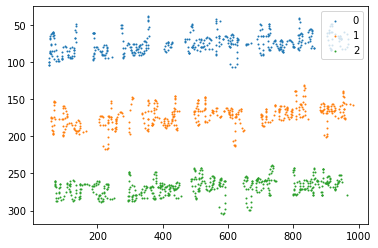

In [37]:
u_labels = np.unique(clustering.labels_)

for i in u_labels:
    plt.scatter(X[labels == i , 0] , X[labels == i , 1] , label = i, s = 1)
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [76]:
textLines = []

for label in u_labels:
    textLine = {} 
    textLine["x"] = np.array(np.array(ink["x"])[labels == label])
    textLine["y"] = np.array(np.array(ink["y"])[labels == label])
    textLine["t"] = np.array(np.array(ink["t"])[labels == label])
    textLine["p"] = np.array(np.array(ink["p"])[labels == label])

    textLines.append(textLine)

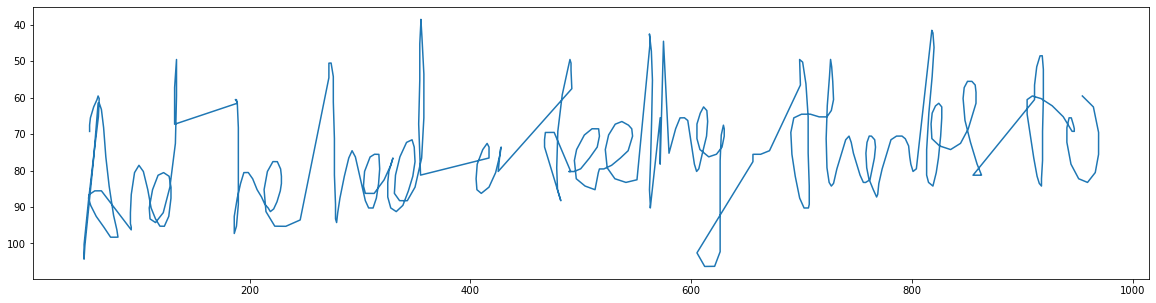

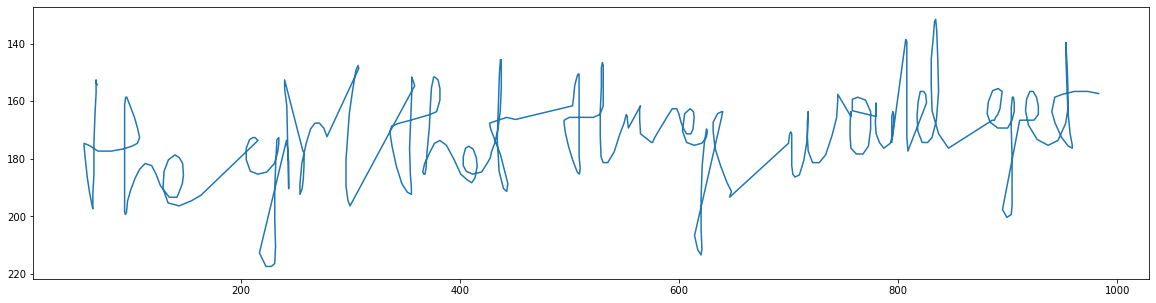

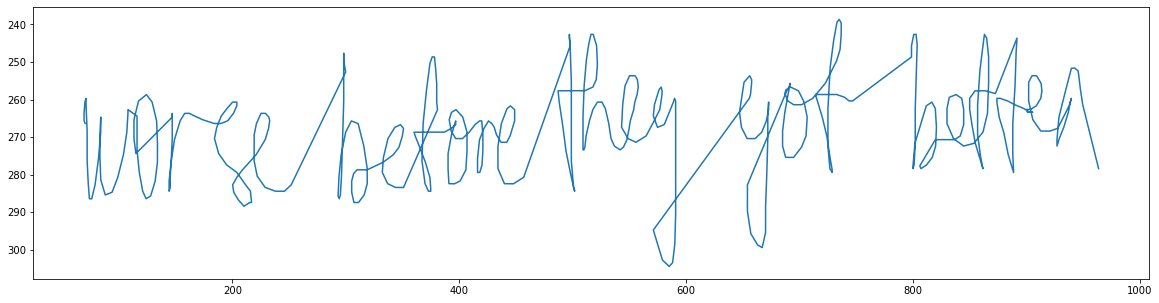

In [77]:
for textLine in textLines:
    plt.figure(figsize=(20,5))
    plt.plot(textLine["x"], textLine["y"])
    plt.gca().invert_yaxis()
    plt.show()

## Create evenly space time series for each line of text

In [78]:
textLines_filled = []

for textLine in textLines:
    x = textLine["x"]
    y = textLine["y"]
    t = textLine["t"]
    p = textLine["p"]

    start_t = t[0]
    end_t = t[len(t) - 1]

    t_filled = np.arange(start_t, end_t, 13)
    x_filled = np.interp(t_filled, t, x)
    y_filled = np.interp(t_filled, t, y)
    p_filled = np.interp(t_filled, t, p)

    textLine_filled = {} 
    textLine_filled["x"] = x_filled
    textLine_filled["y"] = y_filled
    textLine_filled["t"] = t_filled
    textLine_filled["p"] = p_filled

    textLines_filled.append(textLine_filled)

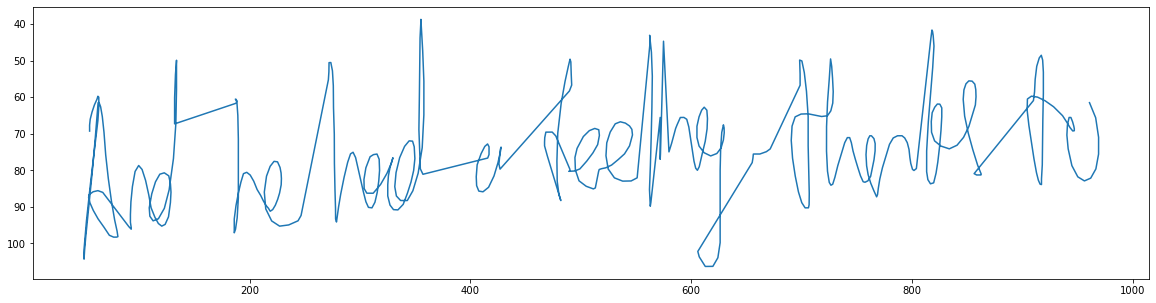

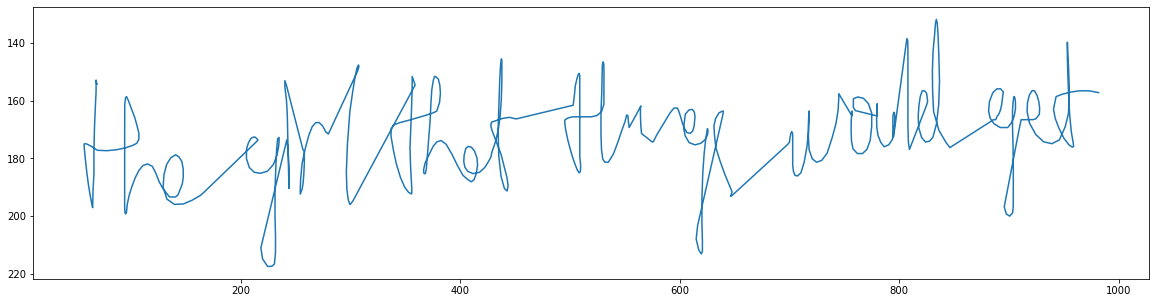

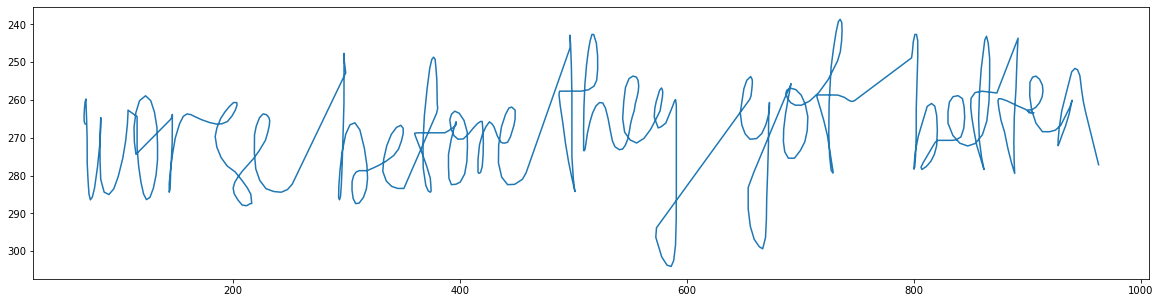

In [79]:
for textLine in textLines_filled:
    x_filled = textLine["x"]
    y_filled = textLine["y"]

    plt.figure(figsize=(20,5))
    plt.plot(x_filled, y_filled)
    plt.gca().invert_yaxis()
    plt.show()

## Splice text lines together into a single line 

In [82]:
for textLine in textLines_filled:
    print("Max of x is", np.max(textLine["x"]))
    print("Mean of y is", np.mean(textLine["y"]))

Max of x is 968.8626346652885
Mean of y is 74.33769506068032
Max of x is 981.5910250560171
Mean of y is 171.65086675382534
Max of x is 962.7983645718176
Mean of y is 267.3327429888


In [ ]:
# Determine the y-mean and x-last of the first line 
y_mean_1 = np.mean(textLines_filled[0]["y"])
x_last_1 = np.max(textLines_filled[0]["x"])

# For each line after the first 
for i in range(1, len(textLines_filled)):
    textLine = textLines_filled[i]

    # Get the x-start and y_mean of the new line 
    x_start_curr = np.min(textLine["x"])